## Homework 5 Runs

### Part 2 Adam

Training Accuracy: 91.69%
Testing Accuracy: 82.28%


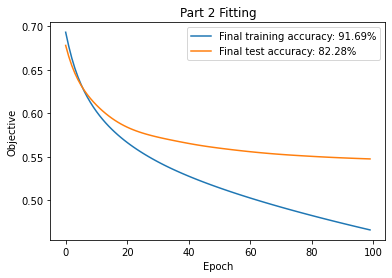

In [8]:
'''
Import Modules
'''
import numpy as np
import hw5_layers as imp
import OneHotEncoder as ohe
import matplotlib.pyplot as plt

'''
Split Data
'''
# Train Data
data = np.genfromtxt('mnist_train_100.csv', delimiter=',', skip_header=True)
np.random.shuffle(data)
XTrain = data[:, 1:]
YTrain = data[:, :1]
oneHot = ohe.OneHotEncoder(YTrain.astype(int))
YTrainohe = oneHot.reformatData()

# Test Data
dataTest = np.genfromtxt('mnist_valid_10.csv', delimiter=',', skip_header=True)
np.random.shuffle(dataTest)
XTest = dataTest[:, 1:]
YTest = dataTest[:, :1]
oneHot = ohe.OneHotEncoder(YTest.astype(int))
YTestohe = oneHot.reformatData()

'''
Archetecture
'''
L1 = imp.InputLayer(XTrain)
L2 = imp.FullyConnected(XTrain.shape[1], 10)
L3 = imp.SigmoidLayer()
L4 = imp.LogLoss()
layers = [L1, L2, L3, L4]

'''
Training and testing
'''
# Variables
epochs = 100
Y_train = YTrainohe
Y_test = YTestohe
objStorage = 0
endDiff = 1e-10
objEvalTrain = []
objEvalTest = []

# Run Epochs
for j in range(epochs):
    H_train = XTrain
    # Forward run
    for i in range(len(layers) - 1):
        H_train = layers[i].forward(H_train)

    # Backwards run
    grad = layers[-1].gradient(Y_train, H_train)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    # Evaluation
    objEval_train = np.mean(layers[-1].eval(Y_train, H_train))
    objEvalTrain.append(objEval_train)

    ## Validation
    H_test = XTest
    # Forward run
    for i in range(len(layers) - 1):
        H_test = layers[i].forward(H_test)

    # Evaluation
    objEval_test = np.mean(layers[-1].eval(Y_test, H_test))
    objEvalTest.append(objEval_test)

    # Loop Break
    diff = np.absolute(objEval_train - objStorage)
    if diff < endDiff:
        break
    objStorage = objEval


H = XTrain
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classification = H
classify =  np.argmax(classification, axis=1).reshape(classification.shape[0], 1)
Classify = (YTrain == classify)
print("Training Accuracy: {0:.2f}%".format((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100))

H = XTest
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classificationTest = H
classifyTest =  np.argmax(classificationTest, axis=1).reshape(classificationTest.shape[0], 1)
ClassifyTest = (YTest == classifyTest)
print("Testing Accuracy: {0:.2f}%".format((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100))

'''
Plot
'''

# Display results
epochs = list(range(0, 100))
plt.figure(1)
plt.plot(epochs, objEvalTrain)
plt.plot(epochs, objEvalTest)
plt.legend([("Final training accuracy:" + " " + (str(round(((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100), 2))) + "%"), ("Final test accuracy:" + " " + (str(round(((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100), 2))) + "%")])
plt.ylabel("Objective")
plt.xlabel("Epoch")
plt.title("Part 2 Fitting")
plt.draw()

plt.show()

### Problem 3

epoch: 0
Epoch Duration: 0:02:40.552210
epoch: 1
Epoch Duration: 0:02:35.542455
epoch: 2
Epoch Duration: 0:02:20.073466
epoch: 3
Epoch Duration: 0:02:40.373151
epoch: 4
Epoch Duration: 0:02:41.501421
epoch: 5
Epoch Duration: 0:02:38.199492
epoch: 6
Epoch Duration: 0:03:05.374138
epoch: 7
Epoch Duration: 0:02:51.204480
epoch: 8
Epoch Duration: 0:03:04.731479
epoch: 9
Epoch Duration: 0:02:54.902886
epoch: 10
Epoch Duration: 0:02:57.598553
epoch: 11
Epoch Duration: 0:03:00.192936
epoch: 12
Epoch Duration: 0:02:55.798704
epoch: 13
Epoch Duration: 0:02:55.686254
epoch: 14
Epoch Duration: 0:02:56.534928
epoch: 15
Epoch Duration: 0:02:55.864354
epoch: 16
Epoch Duration: 0:02:54.894694
epoch: 17
Epoch Duration: 0:02:52.483725
epoch: 18
Epoch Duration: 0:02:54.974010
epoch: 19
Epoch Duration: 0:02:58.115371
epoch: 20
Epoch Duration: 0:02:55.483700
epoch: 21
Epoch Duration: 0:02:54.938193
epoch: 22
Epoch Duration: 0:02:57.090823
epoch: 23
Epoch Duration: 0:02:53.939895
epoch: 24
Epoch Duration: 

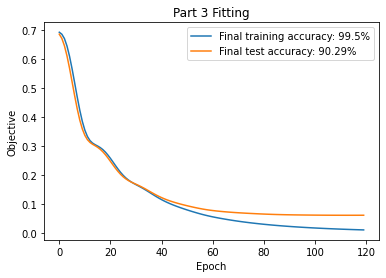

In [2]:
""" Setup 1 """
'''
Import Modules
'''
import numpy as np
import hw5_layers as imp
import OneHotEncoder as ohe
import matplotlib.pyplot as plt
from datetime import datetime as dt

Script_start_time = dt.now()

'''
Split Data
'''
# Train Data
data = np.genfromtxt('mnist_train_100.csv', delimiter=',', skip_header=True)
np.random.shuffle(data)
XTrain = data[:, 1:]
YTrain = data[:, :1]
oneHot = ohe.OneHotEncoder(YTrain.astype(int))
YTrainohe = oneHot.reformatData()

# Test Data
dataTest = np.genfromtxt('mnist_valid_10.csv', delimiter=',', skip_header=True)
np.random.shuffle(dataTest)
XTest = dataTest[:, 1:]
YTest = dataTest[:, :1]
oneHot = ohe.OneHotEncoder(YTest.astype(int))
YTestohe = oneHot.reformatData()

'''
Archetecture
'''
L1 = imp.InputLayer(XTrain)
L2 = imp.FullyConnected(XTrain.shape[1], 450)
L3 = imp.ReLuLayer()
L4 = imp.FullyConnected(450, 10)
L5 = imp.SigmoidLayer()
L6 = imp.LogLoss()
layers = [L1, L2, L3, L4, L5, L6]

'''
Training and testing
'''
# Variables
epochs = 120
Y_train = YTrainohe
Y_test = YTestohe
objStorage = 0
endDiff = 1e-10
epochsStore = []
objEvalTrain = []
objEvalTest = []

# Run Epochs
for j in range(epochs):
    start_time = dt.now()
    print("epoch:", j)
    epochsStore.append(j)
    H_train = XTrain
    # Forward run
    for i in range(len(layers) - 1):
        H_train = layers[i].forward(H_train)

    # Backwards run
    grad = layers[-1].gradient(Y_train, H_train)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    # Evaluation
    objEval_train = np.mean(layers[-1].eval(Y_train, H_train))
    objEvalTrain.append(objEval_train)

    ## Validation
    H_test = XTest
    # Forward run
    for i in range(len(layers) - 1):
        H_test = layers[i].forward(H_test)

    # Evaluation
    objEval_test = np.mean(layers[-1].eval(Y_test, H_test))
    objEvalTest.append(objEval_test)

    end_time = dt.now()
    print("Epoch Duration: {}".format(end_time - start_time))

    # Loop Break
    diff = np.absolute(objEval_train - objStorage)
    if diff < endDiff:
        break
    objStorage = objEval_train


H = XTrain
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classification = H
classify =  np.argmax(classification, axis=1).reshape(classification.shape[0], 1)
Classify = (YTrain == classify)
print("Training Accuracy: {0:.2f}%".format((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100))

H = XTest
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classificationTest = H
classifyTest =  np.argmax(classificationTest, axis=1).reshape(classificationTest.shape[0], 1)
ClassifyTest = (YTest == classifyTest)
print("Testing Accuracy: {0:.2f}%".format((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100))

Script_end_time = dt.now()
print("Total Duration: {}".format(Script_end_time - Script_start_time))

'''
Plot
'''

# Display results
plt.figure(1)
plt.plot(epochsStore, objEvalTrain)
plt.plot(epochsStore, objEvalTest)
plt.legend([("Final training accuracy:" + " " + (str(round(((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100), 2))) + "%"), ("Final test accuracy:" + " " + (str(round(((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100), 2))) + "%")])
plt.ylabel("Objective")
plt.xlabel("Epoch")
plt.title("Part 3 Fitting")
plt.draw()

plt.show()

Epoch 1 Duration: 0:03:01.279574
Epoch 2 Duration: 0:03:03.081771
Epoch 3 Duration: 0:03:00.593005
Epoch 4 Duration: 0:02:59.242987
Epoch 5 Duration: 0:02:58.600674
Epoch 6 Duration: 0:02:59.183602
Epoch 7 Duration: 0:02:58.742485
Epoch 8 Duration: 0:02:59.732292
Epoch 9 Duration: 0:02:56.753798
Epoch 10 Duration: 0:02:57.500601
Epoch 11 Duration: 0:02:56.568702
Epoch 12 Duration: 0:02:33.500319
Epoch 13 Duration: 0:02:27.631616
Epoch 14 Duration: 0:02:20.081983
Epoch 15 Duration: 0:02:27.105193
Epoch 16 Duration: 0:02:29.351149
Epoch 17 Duration: 0:02:31.029872
Epoch 18 Duration: 0:02:26.962429
Epoch 19 Duration: 0:02:27.036822
Epoch 20 Duration: 0:02:27.152231
Epoch 21 Duration: 0:02:27.058530
Epoch 22 Duration: 0:02:27.121531
Epoch 23 Duration: 0:02:26.658525
Epoch 24 Duration: 0:02:26.203762
Epoch 25 Duration: 0:02:26.745086
Epoch 26 Duration: 0:02:26.875938
Epoch 27 Duration: 0:02:26.895818
Epoch 28 Duration: 0:02:26.695549
Epoch 29 Duration: 0:02:26.481271
Epoch 30 Duration: 0:02

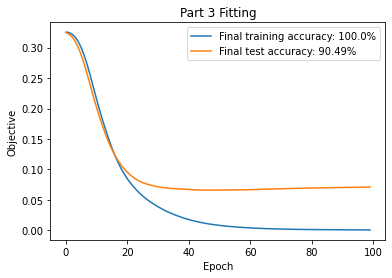

In [1]:
""" Setup 2 """
'''
Import Modules
'''
import numpy as np
import hw5_layers as imp
import OneHotEncoder as ohe
import matplotlib.pyplot as plt
from datetime import datetime as dt

Script_start_time = dt.now()

'''
Split Data
'''
# Train Data
data = np.genfromtxt('mnist_train_100.csv', delimiter=',', skip_header=True)
np.random.shuffle(data)
XTrain = data[:, 1:]
YTrain = data[:, :1]
oneHot = ohe.OneHotEncoder(YTrain.astype(int))
YTrainohe = oneHot.reformatData()

# Test Data
dataTest = np.genfromtxt('mnist_valid_10.csv', delimiter=',', skip_header=True)
np.random.shuffle(dataTest)
XTest = dataTest[:, 1:]
YTest = dataTest[:, :1]
oneHot = ohe.OneHotEncoder(YTest.astype(int))
YTestohe = oneHot.reformatData()

'''
Archetecture
'''
L1 = imp.InputLayer(XTrain)
L2 = imp.FullyConnected(XTrain.shape[1], 450)
L3 = imp.ReLuLayer()
L4 = imp.FullyConnected(450, 10)
L5 = imp.SoftmaxLayer()
L6 = imp.LogLoss()
layers = [L1, L2, L3, L4, L5, L6]

'''
Training and testing
'''
# Variables
epochs = 100
Y_train = YTrainohe
Y_test = YTestohe
objStorage = 0
endDiff = 1e-10
epochsStore = []
objEvalTrain = []
objEvalTest = []

# Run Epochs
for j in range(epochs):
    start_time = dt.now()
    epochsStore.append(j)
    H_train = XTrain
    # Forward run
    for i in range(len(layers) - 1):
        H_train = layers[i].forward(H_train)

    # Backwards run
    grad = layers[-1].gradient(Y_train, H_train)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    # Evaluation
    objEval_train = np.mean(layers[-1].eval(Y_train, H_train))
    objEvalTrain.append(objEval_train)

    ## Validation
    H_test = XTest
    # Forward run
    for i in range(len(layers) - 1):
        H_test = layers[i].forward(H_test)

    # Evaluation
    objEval_test = np.mean(layers[-1].eval(Y_test, H_test))
    objEvalTest.append(objEval_test)

    end_time = dt.now()
    print("Epoch {} Duration: {}".format((j+1), (end_time - start_time)))

    # Loop Break
    diff = np.absolute(objEval_train - objStorage)
    if diff < endDiff:
        break
    objStorage = objEval_train


H = XTrain
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classification = H
classify =  np.argmax(classification, axis=1).reshape(classification.shape[0], 1)
Classify = (YTrain == classify)
print("Training Accuracy: {0:.2f}%".format((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100))

H = XTest
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classificationTest = H
classifyTest =  np.argmax(classificationTest, axis=1).reshape(classificationTest.shape[0], 1)
ClassifyTest = (YTest == classifyTest)
print("Testing Accuracy: {0:.2f}%".format((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100))

Script_end_time = dt.now()
print("Total Duration: {}".format(Script_end_time - Script_start_time))

'''
Plot
'''

# Display results
plt.figure(1)
plt.plot(epochsStore, objEvalTrain)
plt.plot(epochsStore, objEvalTest)
plt.legend([("Final training accuracy:" + " " + (str(round(((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100), 2))) + "%"), ("Final test accuracy:" + " " + (str(round(((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100), 2))) + "%")])
plt.ylabel("Objective")
plt.xlabel("Epoch")
plt.title("Part 3 Fitting")
plt.draw()

plt.show()

Epoch 1 Duration: 0:01:05.768009
Epoch 2 Duration: 0:01:05.140054
Epoch 3 Duration: 0:01:05.120148
Epoch 4 Duration: 0:01:05.042278
Epoch 5 Duration: 0:01:05.031400
Epoch 6 Duration: 0:01:05.090985
Epoch 7 Duration: 0:01:05.254236
Epoch 8 Duration: 0:01:05.148415
Epoch 9 Duration: 0:01:05.089047
Epoch 10 Duration: 0:01:05.000383
Epoch 11 Duration: 0:01:05.021147
Epoch 12 Duration: 0:01:05.451391
Epoch 13 Duration: 0:01:05.547520
Epoch 14 Duration: 0:01:05.305658
Epoch 15 Duration: 0:01:05.082990
Epoch 16 Duration: 0:01:05.168806
Epoch 17 Duration: 0:01:05.069319
Epoch 18 Duration: 0:01:05.023883
Epoch 19 Duration: 0:01:05.567898
Epoch 20 Duration: 0:01:05.297495
Epoch 21 Duration: 0:01:05.218324
Epoch 22 Duration: 0:01:05.009809
Epoch 23 Duration: 0:01:05.160316
Epoch 24 Duration: 0:01:05.069653
Epoch 25 Duration: 0:01:05.308328
Epoch 26 Duration: 0:01:05.005145
Epoch 27 Duration: 0:01:05.059694
Epoch 28 Duration: 0:01:05.044967
Epoch 29 Duration: 0:01:05.115890
Epoch 30 Duration: 0:01

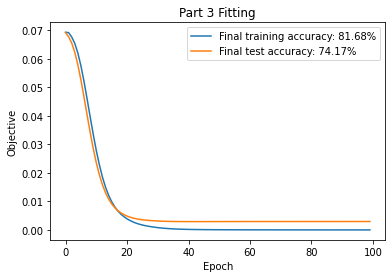

In [1]:
""" Setup 3 """
'''
Import Modules
'''
import numpy as np
import hw5_layers as imp
import OneHotEncoder as ohe
import matplotlib.pyplot as plt
from datetime import datetime as dt

Script_start_time = dt.now()

'''
Split Data
'''
# Train Data
data = np.genfromtxt('mnist_train_100.csv', delimiter=',', skip_header=True)
np.random.shuffle(data)
XTrain = data[:, 1:]
YTrain = data[:, :1]
oneHot = ohe.OneHotEncoder(YTrain.astype(int))
YTrainohe = oneHot.reformatData()

# Test Data
dataTest = np.genfromtxt('mnist_valid_10.csv', delimiter=',', skip_header=True)
np.random.shuffle(dataTest)
XTest = dataTest[:, 1:]
YTest = dataTest[:, :1]
oneHot = ohe.OneHotEncoder(YTest.astype(int))
YTestohe = oneHot.reformatData()

'''
Archetecture
'''
L1 = imp.InputLayer(XTrain)
L2 = imp.FullyConnected(XTrain.shape[1], 300)
L3 = imp.LinearLayer()
L4 = imp.FullyConnected(300, 10)
L5 = imp.SigmoidLayer()
L6 = imp.CrossEntropy()
layers = [L1, L2, L3, L4, L5, L6]

'''
Training and testing
'''
# Variables
epochs = 100
Y_train = YTrainohe
Y_test = YTestohe
objStorage = 0
endDiff = 1e-10
epochsStore = []
objEvalTrain = []
objEvalTest = []

# Run Epochs
for j in range(epochs):
    start_time = dt.now()
    epochsStore.append(j)
    H_train = XTrain
    # Forward run
    for i in range(len(layers) - 1):
        H_train = layers[i].forward(H_train)

    # Backwards run
    grad = layers[-1].gradient(Y_train, H_train)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    # Evaluation
    objEval_train = np.mean(layers[-1].eval(Y_train, H_train))
    objEvalTrain.append(objEval_train)

    ## Validation
    H_test = XTest
    # Forward run
    for i in range(len(layers) - 1):
        H_test = layers[i].forward(H_test)

    # Evaluation
    objEval_test = np.mean(layers[-1].eval(Y_test, H_test))
    objEvalTest.append(objEval_test)

    end_time = dt.now()
    print("Epoch {} Duration: {}".format((j+1), (end_time - start_time)))

    # Loop Break
    diff = np.absolute(objEval_train - objStorage)
    if diff < endDiff:
        break
    objStorage = objEval_train


H = XTrain
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classification = H
classify =  np.argmax(classification, axis=1).reshape(classification.shape[0], 1)
Classify = (YTrain == classify)
print("Training Accuracy: {0:.2f}%".format((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100))

H = XTest
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classificationTest = H
classifyTest =  np.argmax(classificationTest, axis=1).reshape(classificationTest.shape[0], 1)
ClassifyTest = (YTest == classifyTest)
print("Testing Accuracy: {0:.2f}%".format((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100))

Script_end_time = dt.now()
print("Total Duration: {}".format(Script_end_time - Script_start_time))

'''
Plot
'''

# Display results
plt.figure(1)
plt.plot(epochsStore, objEvalTrain)
plt.plot(epochsStore, objEvalTest)
plt.legend([("Final training accuracy:" + " " + (str(round(((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100), 2))) + "%"), ("Final test accuracy:" + " " + (str(round(((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100), 2))) + "%")])
plt.ylabel("Objective")
plt.xlabel("Epoch")
plt.title("Part 3 Fitting")
plt.draw()

plt.show()

### Problem 4

Training Accuracy: 44.94%
Testing Accuracy: 81.78%


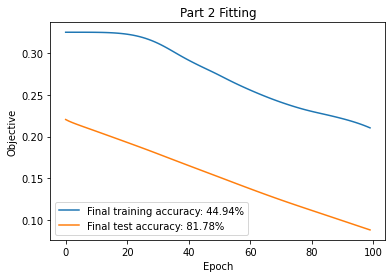

In [1]:
'''
Import Modules
'''
import numpy as np
import hw5_layers as imp
import OneHotEncoder as ohe
import matplotlib.pyplot as plt

'''
Split Data
'''
# Train Data
data = np.genfromtxt('mnist_train_100.csv', delimiter=',', skip_header=True)
np.random.shuffle(data)
XTrain = data[:, 1:]
YTrain = data[:, :1]
oneHot = ohe.OneHotEncoder(YTrain.astype(int))
YTrainohe = oneHot.reformatData()

# Test Data
dataTest = np.genfromtxt('mnist_valid_10.csv', delimiter=',', skip_header=True)
np.random.shuffle(dataTest)
XTest = dataTest[:, 1:]
YTest = dataTest[:, :1]
oneHot = ohe.OneHotEncoder(YTest.astype(int))
YTestohe = oneHot.reformatData()

'''
Archetecture
'''
L1 = imp.InputLayer(XTrain)
L2 = imp.FullyConnected(XTrain.shape[1], 50)
L3 = imp.ReLuLayer()
L4 = imp.FullyConnected(50, 10)
L5 = imp.ReLuLayer()
L6 = imp.FullyConnected(10, 10)
L7 = imp.SoftmaxLayer()
L8 = imp.LogLoss()
layers = [L1, L2, L3, L4, L5, L6, L7, L8]

'''
Training and testing
'''
# Beginning Settings
epochs = 100
Y = YTrainohe
objStorage = 0
endDiff = 1e-10
objEvalTrain = []

# Train
for j in range(epochs):
    H = XTrain
    # Forward run
    for i in range(len(layers) - 1):
        H = layers[i].forward(H)


    # Backwards run
    grad = layers[-1].gradient(Y, H)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    objEval = np.mean(layers[-1].eval(Y, H))
    objEvalTrain.append(objEval)
    diff = np.absolute(objEval - objStorage)
    if diff < endDiff:
        break
    objStorage = objEval


H = XTrain
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classification = H
classify =  np.argmax(classification, axis=1).reshape(classification.shape[0], 1)
Classify = (YTrain == classify)
print("Training Accuracy: {0:.2f}%".format((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100))


# Test
# Beginning Settings
epochs = 100
Y = YTestohe
objStorage = 0
endDiff = 1e-10
objEvalTest = []


for j in range(epochs):
    H = XTest
    # Forward run
    for i in range(len(layers) - 1):
        H = layers[i].forward(H)


    # Backwards run
    grad = layers[-1].gradient(Y, H)
    for i in range(len(layers) - 2, 0, -1):
        newGrad = layers[i].backward(grad)
        if isinstance(layers[i], imp.FullyConnected):
            layers[i].updateWeights2(grad, j)
        grad = newGrad

    objEval = np.mean(layers[-1].eval(Y, H))
    objEvalTest.append(objEval)
    diff = np.absolute(objEval - objStorage)
    #print(j)
    if diff < endDiff:
        break
    objStorage = objEval


H = XTest
for i in range(len(layers) - 1):
    H = layers[i].forward(H)


classificationTest = H
classifyTest =  np.argmax(classificationTest, axis=1).reshape(classificationTest.shape[0], 1)
ClassifyTest = (YTest == classifyTest)
print("Testing Accuracy: {0:.2f}%".format((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100))

'''
Plot
'''
# Display results
epoch = list(range(0, epochs))
plt.figure(1)
plt.plot(epoch, objEvalTrain)
plt.plot(epoch, objEvalTest)
plt.legend([("Final training accuracy:" + " " + (str(round(((np.count_nonzero(Classify) / np.size(YTrain, axis=0)) * 100), 2))) + "%"), ("Final test accuracy:" + " " + (str(round(((np.count_nonzero(ClassifyTest) / np.size(YTest, axis=0)) * 100), 2))) + "%")])
plt.ylabel("Objective")
plt.xlabel("Epoch")
plt.title("Part 2 Fitting")
plt.draw()

plt.show()
